In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import time
import bacteria_numba_no_saturation as bacnosat
import bacteria_numba as bacsat
import sys
import os
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm


Bad key text.latex.preview in file /home/pedroc/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file /home/pedroc/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file /home/pedroc/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 418 ('savefig.jpeg_quality: 95       # when a jpeg is saved, the default qualit

In [2]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

In [3]:
data = np.loadtxt('Results/final_populations_D_s_and_L.txt')
times = np.loadtxt('Results/final_times_D_s_and_L.txt')

In [4]:
D_ss = np.logspace(-2, 1, 250)
Ls = np.arange(2, 41, 2)

In [5]:
maximum_pop = 0.1*(Ls/0.1)*0.1

In [6]:
data = data/maximum_pop

In [7]:
data[np.where(times == np.max(times))] = 0

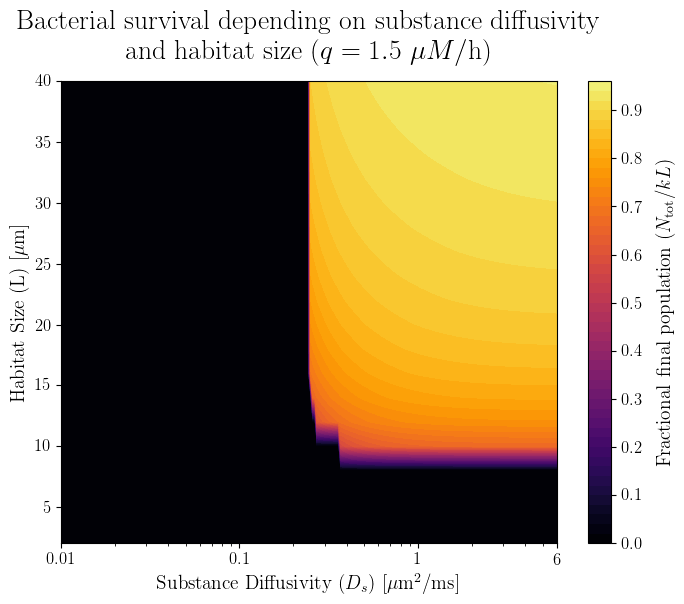

In [15]:
X, Y = np.meshgrid(D_ss, Ls)
fig, ax = plt.subplots(figsize=(8,6))
heat = plt.contourf(X, Y, data.T, cmap = 'inferno', levels = 50, vmax = 1, vmin = 0)
cbar = plt.colorbar(heat, ticks = [0.1*i for i in range(11)])
cbar.ax.set_ylabel(r'Fractional final population $\left( N_{\mathrm{tot}}/kL \right)$', fontsize = 14, labelpad = 10)
cbar.ax.set_yticklabels([f"{0.1*i:.1f}" for i in range(11)], fontsize = 12)
plt.xscale('log')
plt.xlim(1e-2, 6e0)
plt.xlabel(r'Substance Diffusivity $(D_s)$ $[\mu \mathrm{m}^2 /\mathrm{ms}]$', fontsize = 14)
plt.xticks([1e-2,1e-1,1e0,6e0], labels = ['0.01','0.1','1','6'], fontsize = 12)
plt.ylabel(r'Habitat Size (L) [$\mu \mathrm{m}$]', fontsize = 14)
plt.yticks(fontsize = 12)
# plt.axvline(800/1000, color = 'teal', lw = 2, ls = '--')
plt.title('Bacterial survival depending on substance diffusivity \n and habitat size ($q = 1.5$ $\mu M/\mathrm{h}$)', fontsize = 20, pad = 16)
fig.patch.set_alpha(0.2)
plt.savefig('Plots/Substance_diffusivity_habitat_size_poster.png', dpi = 900, bbox_inches = 'tight')
# plt.savefig('Plots/Substance_diffusivity_habitat_size_poster.svg', dpi = 300, bbox_inches = 'tight')
plt.show()

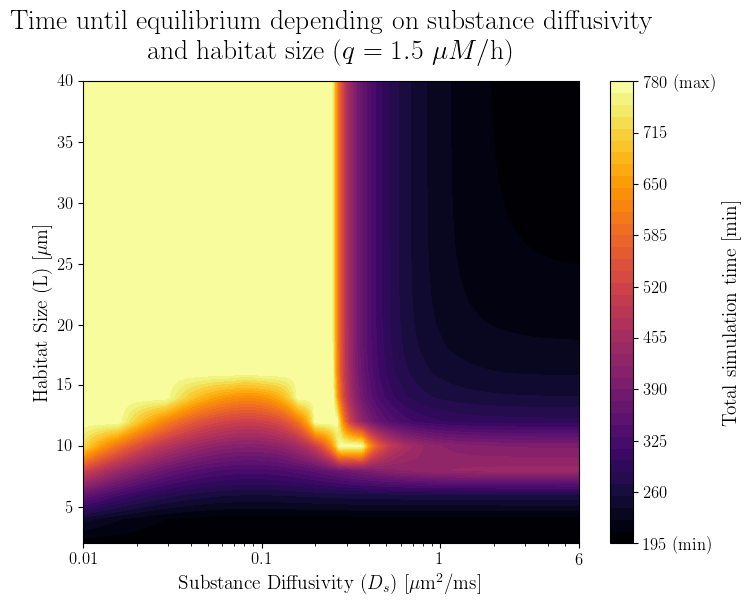

In [14]:
X, Y = np.meshgrid(D_ss, Ls)
fig, ax = plt.subplots(figsize=(8,6))
heat = plt.contourf(X, Y, times.T, cmap = 'inferno', levels = 50, vmax = np.max(times), vmin = np.min(times))
cbar = plt.colorbar(heat, ticks = [195,260,325,390,455,520,585,650,715,780])
cbar.ax.set_ylabel(r'Total simulation time [min]', fontsize = 14)
cbar.ax.set_yticklabels(['195 (min)',260,325,390,455,520,585,650,715,'780 (max)'], fontsize = 12)
plt.xscale('log')
plt.xlim(1e-2, 6e0)
plt.xlabel(r'Substance Diffusivity $(D_s)$ $[\mu \mathrm{m}^2 /\mathrm{ms}]$', fontsize = 14)
plt.xticks([1e-2,1e-1,1e0,6e0], labels = ['0.01','0.1','1','6'], fontsize = 12)
plt.ylabel(r'Habitat Size (L) [$\mu \mathrm{m}$]', fontsize = 14)
plt.yticks(fontsize = 12)
plt.title('Time until equilibrium depending on substance diffusivity \n and habitat size ($q = 1.5$ $\mu M/\mathrm{h}$)', fontsize = 20, pad = 16)
fig.patch.set_alpha(0.2)
plt.savefig('Plots/Substance_diffusivity_habitat_size_simulation_time_poster.png', dpi = 900, bbox_inches = 'tight')
# plt.savefig('Plots/Substance_diffusivity_habitat_size_simulation_time_poster.svg', dpi = 300, bbox_inches = 'tight')
plt.show()